In [1]:
import random
import numpy as np
import pandas as pd 
import os
from glob import glob
import matplotlib.pyplot as plt
import cv2

In [114]:
sealion_csv = pd.read_csv('train.csv')
train = sealion_csv.as_matrix()
train = np.delete(train, 0, 1)
print train
headers = sealion_csv.keys()
print headers
# headers are [u'train_id', u'adult_males', u'subadult_males', u'adult_females',  u'juveniles', u'pups']

[[ 62  12 486  42 344]
 [  2  20   0  12   0]
 [  2   0  38  20   0]
 ..., 
 [  6   0  79   6  45]
 [  3   1  34  33   0]
 [  6   4  29   6  24]]
Index([u'train_id', u'adult_males', u'subadult_males', u'adult_females',
       u'juveniles', u'pups'],
      dtype='object')


In [115]:
img_id = 0

results_directory = os.path.join('results', 'Train', 'probmaps')
rfname = 'probability-map-{}.npz'.format(img_id)
# load probability map
X = np.load(os.path.join(results_directory, rfname))
probmap = X['arr_0']

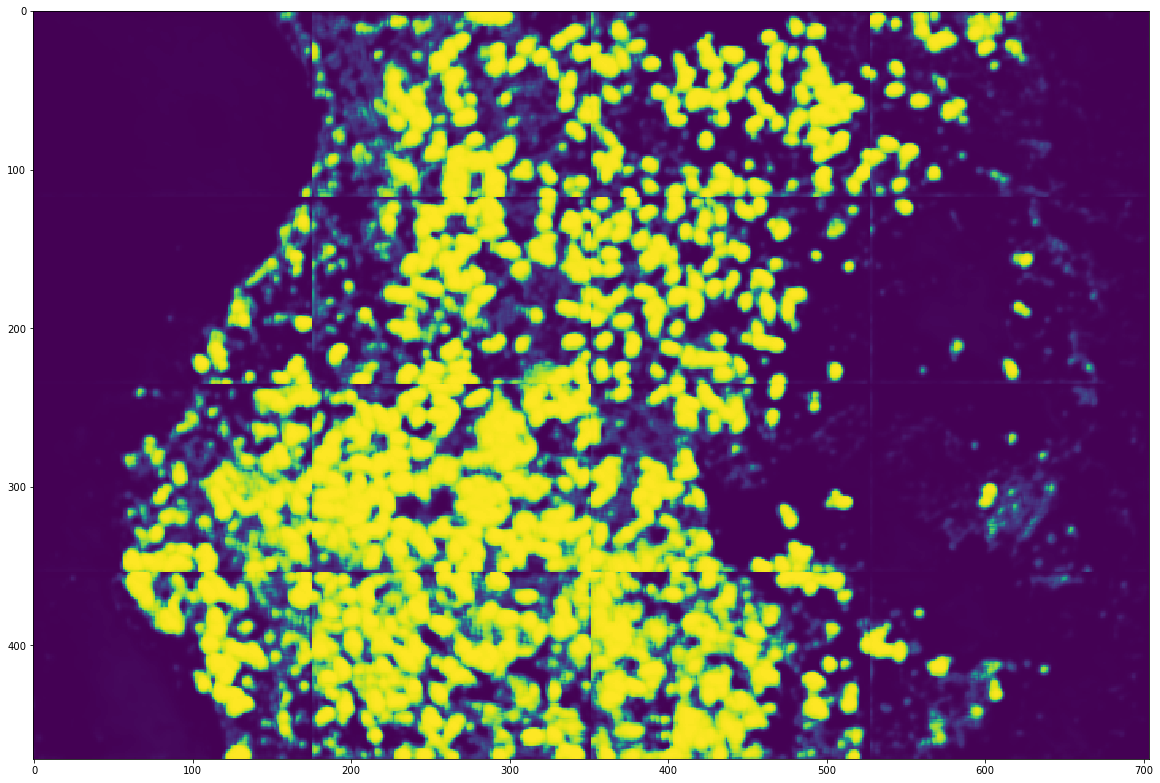

In [116]:
plt.figure(figsize=(20,20))
plt.imshow(probmap)
plt.show()

In [117]:
sealion_csv = pd.read_csv('train.csv')

print sealion_csv[sealion_csv.train_id == img_id]

   train_id  adult_males  subadult_males  adult_females  juveniles  pups
0         0           62              12            486         42   344


this image contains 62 sealions
   train_id  adult_males  subadult_males  adult_females  juveniles  pups
2         2            2               0             38         20     0


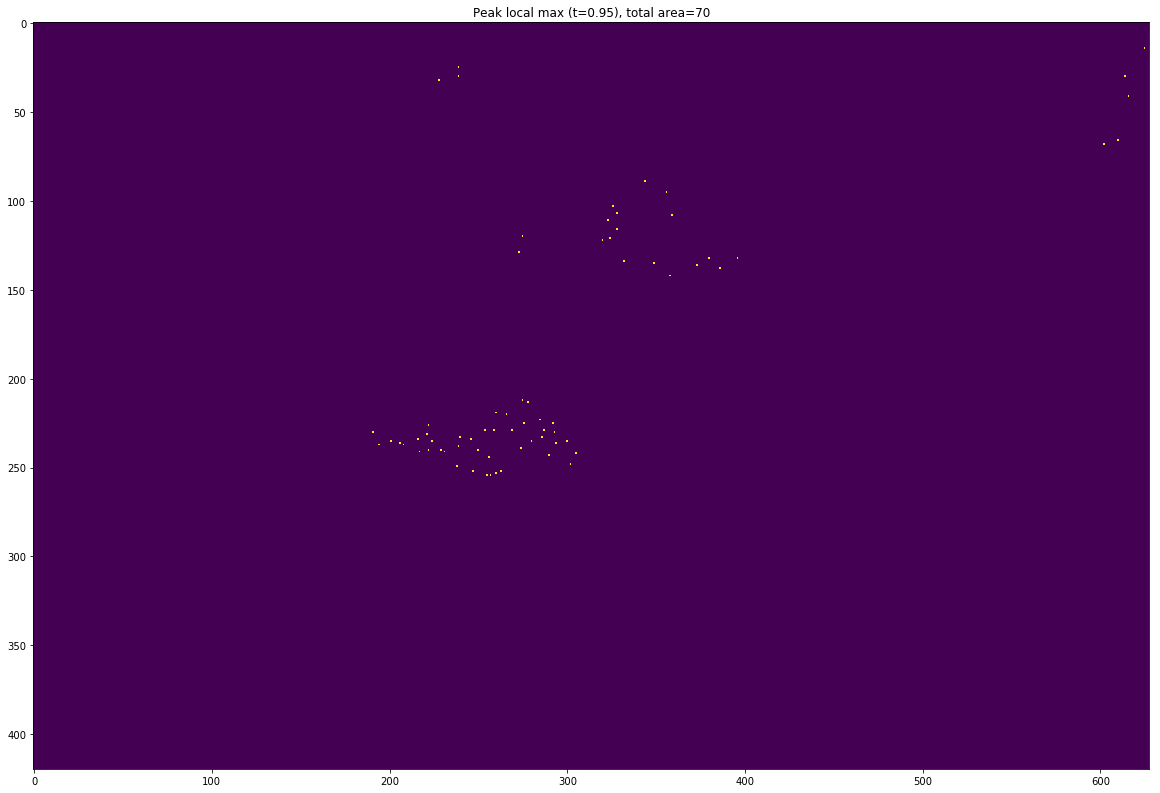

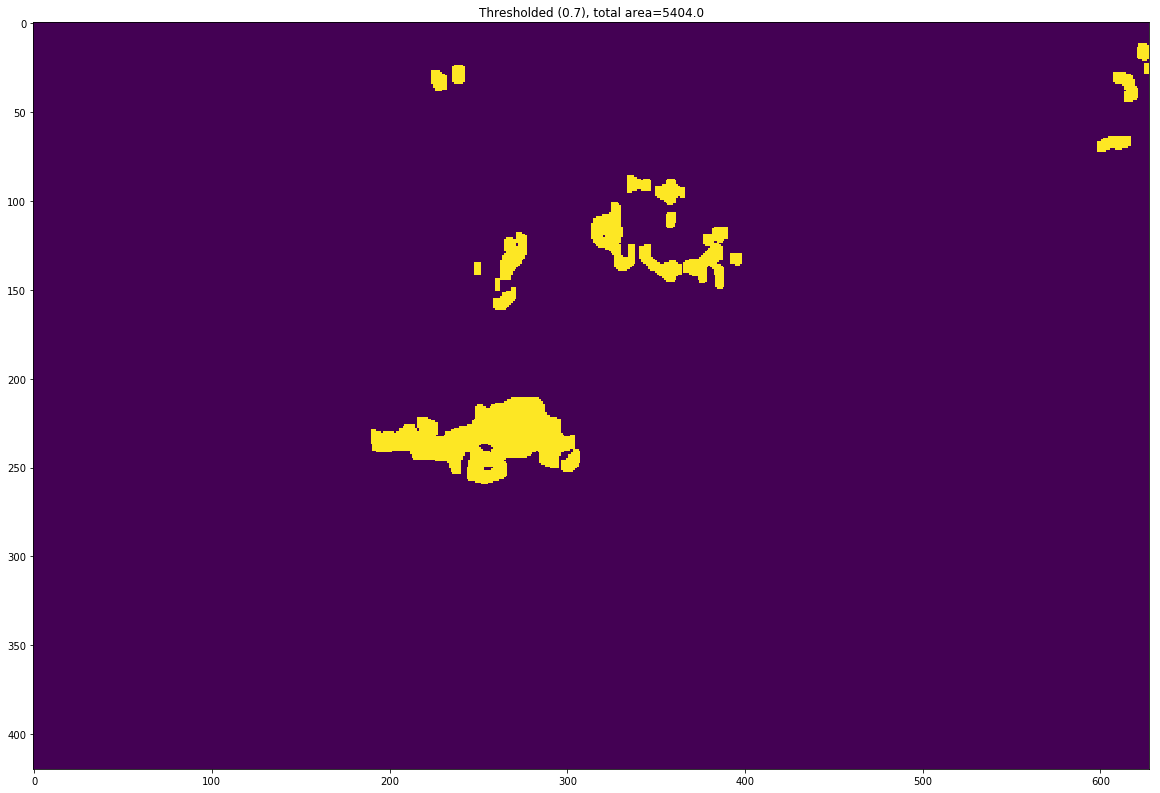

In [118]:
from skimage.feature import peak_local_max
img_id = 2

results_directory = os.path.join('results', 'Train', 'probmaps')
rfname = 'probability-map-{}.npz'.format(img_id)
# load probability map
X = np.load(os.path.join(results_directory, rfname))
probmap = X['arr_0']

treshold = 0.7
plm_threshold = 0.95

print 'this image contains', sealion_csv[sealion_csv.train_id == img_id].as_matrix().sum(), 'sealions'
print sealion_csv[sealion_csv.train_id == img_id]

# peak local maxima
plm = peak_local_max(probmap, indices = False, threshold_abs=plm_threshold )

plt.figure(figsize=(20,20))
plt.imshow(plm)
plt.title('Peak local max (t={}), total area={}'.format(plm_threshold, np.sum(plm)))

# plain thresholding
treshmap = np.round(probmap-(treshold-0.5))
kernel = np.ones((6,3),np.uint8)
treshmap = cv2.erode(treshmap, kernel)
kernel = np.ones((6,3),np.uint8)
treshmap = cv2.dilate(treshmap, kernel)

plt.figure(figsize=(20,20))
plt.imshow(treshmap)
plt.title('Thresholded ({}), total area={}'.format(treshold, np.sum(treshmap)))

sealion_sum = np.sum(treshmap)
plt.show()

In [119]:
sealion_space_plm = []
sealion_space = []
sealion_total = []

kernel = np.ones((6,3), np.uint8)
threshold = 0.7
threshold_plm = 0.95
for img_id in range(len(train)):
    rfname = 'probability-map-{}.npz'.format(img_id)
    # load probability map
    X = np.load(os.path.join(results_directory, rfname))
    probmap = X['arr_0']
    
    # with peak local max
    plm = peak_local_max(probmap, indices=False, min_distance=10,threshold_abs=threshold_plm)
    sealion_space_plm.append(np.sum(plm))

    # with dilate and stuff
    # opening seems to work better than peak local max

    threshmap = np.round(probmap-(threshold-0.5))
    threshmap = cv2.erode(threshmap, kernel)
    threshmap = cv2.dilate(threshmap, kernel)

    sealion_sum = np.sum(threshmap)
    sealion_space.append(sealion_sum)
    sealion_total.append(np.sum(train[img_id]))

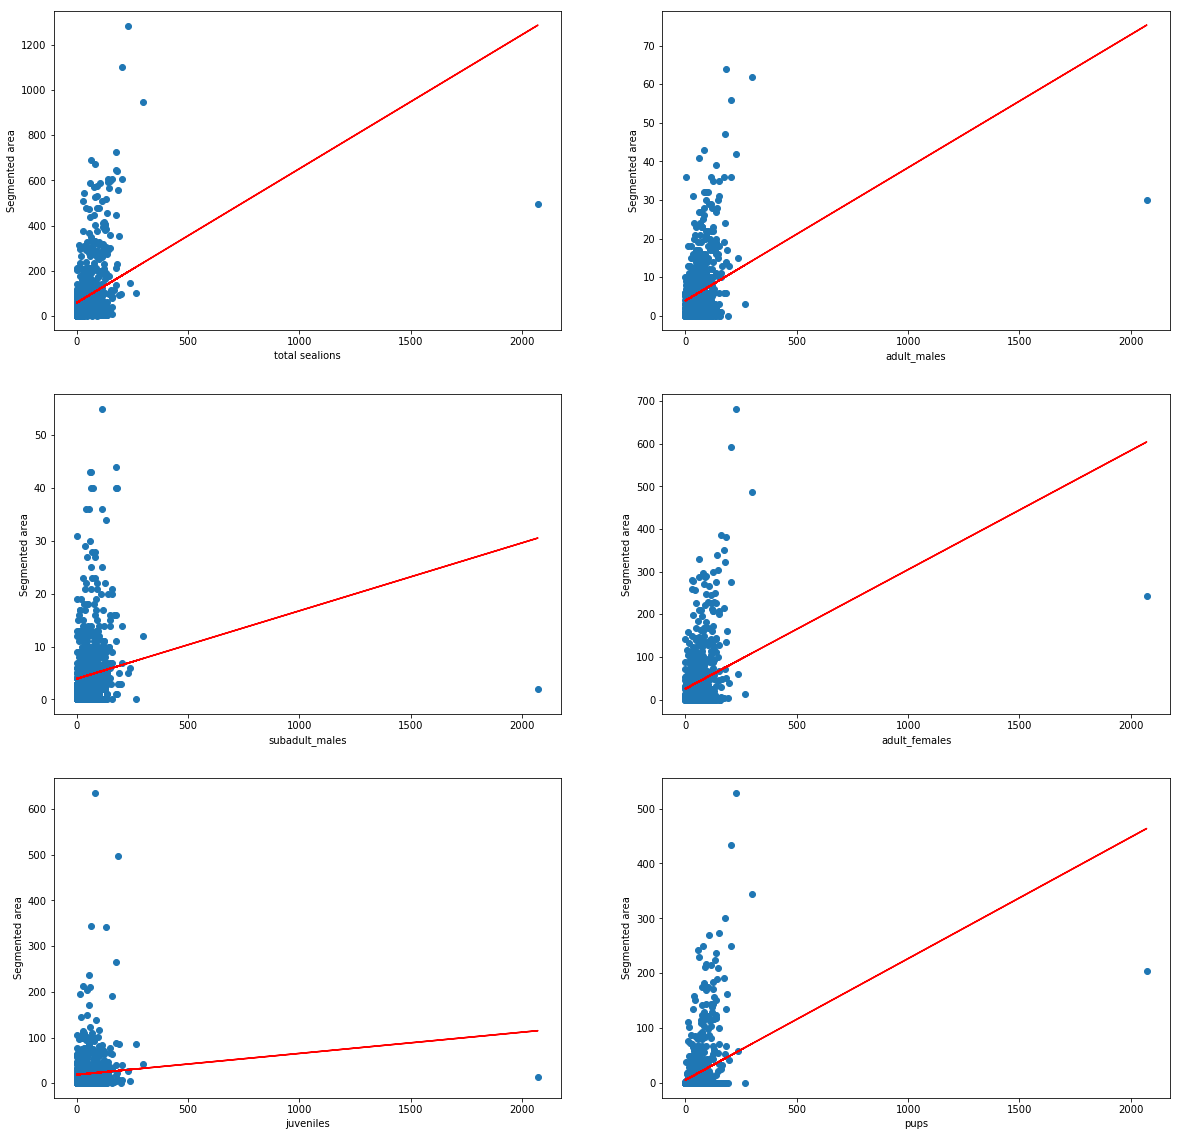

[array([ 0.03446837,  3.9385302 ]), array([ 0.01285869,  3.93076817]), array([  0.27952529,  25.41037772]), array([  0.04644448,  18.86451039]), array([ 0.22096895,  5.96432867])]


In [120]:
#hard coded plots ftw

plt.figure(figsize=(20,20))
sealion_choice = np.asarray(sealion_space_plm)
regression_ratio = []
from scipy.stats.stats import pearsonr
# some correlations

print pearsonr(sealion_total,sealion_choice)
print pearsonr(train[:,0],sealion_choice)
print pearsonr(train[:,1],sealion_choice)
print pearsonr(train[:,2],sealion_choice)
print pearsonr(train[:,3],sealion_choice)
print pearsonr(train[:,4],sealion_choice)

plt.subplot(3,2,1)
plt.scatter(sealion_choice, sealion_total)
fit = np.polyfit(sealion_choice, sealion_total, 1)
plt.plot(sealion_choice,fit[0] *sealion_choice + fit[1], color = 'red')
plt.xlabel('total sealions')
plt.ylabel('Segmented area')

plt.subplot(3,2,2)
plt.scatter(sealion_choice, train[:,0])
fit = np.polyfit(sealion_choice, train[:,0], 1)
plt.plot(sealion_choice, fit[0] * sealion_choice + fit[1], color='red')
plt.xlabel('adult_males')
plt.ylabel('Segmented area')
regression_ratio.append(fit)

plt.subplot(3,2,3)
plt.scatter(sealion_choice, train[:,1])
fit = np.polyfit(sealion_choice, train[:,1], 1)
plt.plot(sealion_choice, fit[0] * sealion_choice + fit[1], color='red')
plt.xlabel('subadult_males')
plt.ylabel('Segmented area')
regression_ratio.append(fit)

plt.subplot(3,2,4)
plt.scatter(sealion_choice, train[:,2])
fit = np.polyfit(sealion_choice, train[:,2], 1)
plt.plot(sealion_choice, fit[0] * sealion_choice + fit[1], color='red')
plt.xlabel('adult_females')
plt.ylabel('Segmented area')
regression_ratio.append(fit)

plt.subplot(3,2,5)
plt.scatter(sealion_choice, train[:,3])
fit = np.polyfit(sealion_choice, train[:,3], 1)
plt.plot(sealion_choice, fit[0] * sealion_choice + fit[1], color='red')
plt.xlabel('juveniles')
plt.ylabel('Segmented area')
regression_ratio.append(fit)

plt.subplot(3,2,6)
plt.scatter(sealion_choice, train[:,4])
fit = np.polyfit(sealion_choice, train[:,4], 1)
plt.plot(sealion_choice, fit[0] * sealion_choice + fit[1], color='red')
plt.xlabel('pups')
plt.ylabel('Segmented area')
regression_ratio.append(fit)
plt.show()

print regression_ratio

(0.44356186473223802, 5.7571383102164205e-47)
(0.38822963813538414, 1.8313712175942705e-35)
(0.25544932496414435, 1.3748165444411316e-15)
(0.38014708101766936, 5.8679911266413481e-34)
(0.26395053510420213, 1.4183377302208936e-16)
(0.35831147324504231, 4.2623181052310824e-30)


In [122]:
train_size = int(0.8 * len(train))
print len(train)

# splitting into train and valset
# not used anymore
train_set = train[0:train_size,:]
val_set = train[train_size:len(train),:]

train_total = sealion_total[0:train_size]
val_total = sealion_total[train_size:len(train)]

train_space = sealion_space[0:train_size]
val_space = sealion_space[train_size:len(train)]

print float(np.sum(train_set[:,3]))/float(np.sum(train_total))

948
0.2460554371


In [126]:
rates = []
rates_plm = []
meme_ratio = [5, 4, 26, 15, 11]

for i in range(0,5):
    # ratio per sea lion to space
    train_ratio = float(0.95*np.mean(train[:,i])-0.10*np.std(train[:,i]))
    space_ratio = np.mean(sealion_space)
    space_plm_ratio = np.mean(sealion_space_plm)
    
    #float(0.94*np.mean(sealion_space)-0.12*np.std(sealion_space))
    ratio = meme_ratio[i]/space_ratio
    ratio_plm = meme_ratio[i]/space_plm_ratio
    rates.append(ratio)
    rates_plm.append(ratio_plm)
print(rates)



predict = []
predict_plm = []
predict_regression = []
ugliest_predict = []
meme = 0.94*np.mean(train, axis=0)-0.12*np.std(train,axis = 0)
print meme

# calculating the expected ammount of sealions
for i in range(len(sealion_total)):
    pred = []
    pred_plm = []
    pred_reg = []
    for j in range(5):
        p = sealion_space[i]*rates[j]
        p_plm = sealion_space_plm[i]*rates_plm[j]
        pred.append(np.round(p))
        pred_plm.append(np.round(p_plm))
        pred_reg.append(np.round(regression_ratio[j][0]*sealion_space_plm[i] + regression_ratio[j][1]))
    
    predict.append(pred)
    predict_plm.append(pred_plm)
    predict_regression.append(pred_reg)
    ugliest_predict.append(meme)

print 'reg rates', rates
print 'plm rates', rates_plm
print 'ratio between rates', np.array(rates_plm) / np.array(rates)
print 'regression_ratio', regression_ratio

print predict_regression[0:10]

[0.00048121861609444797, 0.00038497489287555838, 0.0025023368036911297, 0.001443655848283344, 0.0010586809554077856]
[  4.437074     3.53869015  29.09913131  14.95554234  10.37718912]
reg rates [0.00048121861609444797, 0.00038497489287555838, 0.0025023368036911297, 0.001443655848283344, 0.0010586809554077856]
plm rates [0.098524215339846191, 0.07881937227187695, 0.51232591976720021, 0.29557264601953859, 0.21675327374766162]
ratio between rates [ 204.73899397  204.73899397  204.73899397  204.73899397  204.73899397]
regression_ratio [array([ 0.03446837,  3.9385302 ]), array([ 0.01285869,  3.93076817]), array([  0.27952529,  25.41037772]), array([  0.04644448,  18.86451039]), array([ 0.22096895,  5.96432867])]
[[14.0, 8.0, 109.0, 33.0, 72.0], [8.0, 5.0, 56.0, 24.0, 30.0], [5.0, 4.0, 31.0, 20.0, 10.0], [4.0, 4.0, 26.0, 19.0, 6.0], [6.0, 5.0, 39.0, 21.0, 17.0], [4.0, 4.0, 28.0, 19.0, 8.0], [5.0, 4.0, 34.0, 20.0, 13.0], [7.0, 5.0, 53.0, 23.0, 28.0], [6.0, 5.0, 40.0, 21.0, 17.0], [5.0, 4.0, 3

[ 41.  10.   3.   0.   4.   0.   2.  11.   5.   1.   1.   2.   5.   2.   1.
   0.   0.   3.   1.   1.   2.   1.   3.   1.   2.   7.   7.   4.   1.   1.
   1.   7.   0.   9.   6.   0.   1.   0.   2.   2.   2.   4.   1.  19.   0.
   5.   6.  17.   4.   0.   0.   2.   6.   6.   0.  18.   7.   0.  11.   4.
  25.   2.  10.  10.   6.  15.  19.  11.   1.  11.  15.   0.   5.   7.   2.
   1.   0.   4.   0.  11.   3.   0.   1.   2.   0.   0.   2.   4.   6.   0.
   1.  11.   4.   6.   0.   4.   7.   1.   5.   5.   4.   2.   1.   0.   1.
   1.   1.   8.  10.   1.   6.   5.  24.   0.   7.   0.   1.   0.   3.   3.
   5.   5.   4.   0.  14.   1.   8.   2.   9.   4.   5.   4.   1.   3.   2.
   1.   1.   0.   2.   1.   0.   6.   1.   0.   1.   1.   3.   3.   5.  17.
   1.   1.   6.   6.   3.   6.   1.   3.   6.   5.   5.   0.   3.   3.  11.
   3.   2.   7.  11.   2.   5.   7.   2.   4.   7.   5.   4.   6.   8.   0.
   1.  13.   0.   7.   1.   4.   1.  27.   5.  27.   6.   6.   0.   6.   0.
   2.   6.  

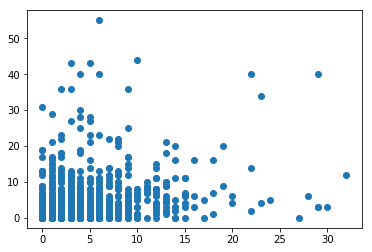

In [127]:
predict = np.asarray(predict)
predict_plm = np.asarray(predict_plm)
predict_regression = np.asarray(predict_regression)
ugliest_predict = np.asarray(ugliest_predict)
print predict[:,0]
print train[:,0]
plt.scatter(predict[:,1],train[:,1])
plt.show()

In [128]:
# calculating the columnwise root mean squared error

# with hand calculated means 32.9994901242, 34.6608654775

from sklearn.metrics import mean_squared_error
from math import sqrt

error = 0
for i in range(5):
    error = error + sqrt(mean_squared_error(predict[:,i], train[:,i]))

print "crafted solution", error/5.0

ugly_error = 0
for i in range(5):
    ugly_error = ugly_error + sqrt(mean_squared_error(ugliest_predict[:,i], train[:,i]))

print "meme solution", ugly_error/5.0

error_plm = 0
for i in range(5):
    error_plm = error_plm + sqrt(mean_squared_error(predict_plm[:,i], train[:,i]))
    

print "plm solution", error_plm/5.0

error_reg = 0
for i in range(5):
    error_reg = error_reg + sqrt(mean_squared_error(predict_regression[:,i], train[:,i]))
    
print "plm regression", error_reg/5.0

crafted solution 33.0760853437
meme solution 34.6608654775
plm solution 35.2824827949
plm regression 32.7489219088


In [95]:
'''
threshold .95
crafted solution 33.5466273278
meme solution 34.6608654775
plm solution 35.5989081409

'''

'\nthreshold .95\ncrafted solution 33.5466273278\nmeme solution 34.6608654775\nplm solution 35.5989081409\n\n'

In [131]:
print threshold_plm
print kernel
print regression_ratio
print regression_ratio[0][0]*1 + regression_ratio[0][1]

0.95
[[1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]]
[array([ 0.03446837,  3.9385302 ]), array([ 0.01285869,  3.93076817]), array([  0.27952529,  25.41037772]), array([  0.04644448,  18.86451039]), array([ 0.22096895,  5.96432867])]
3.97299856833


In [132]:
test_results_directory = os.path.join('results', 'Test', 'probmaps')
test_result_space = []
begin_map = 0
last_map = 18636
for img_id in range(begin_map, last_map):
#     bad_img_id = [10174]
    if img_id % 500 == 0:
        print "Now doing image nr ", img_id
        
#     if img_id in bad_img_id:
#         fake_pred = [img_id, 5, 4, 26, 15, 11]
#         test_result_space.append(fake_pred)
#         continue
        
    rfname = 'probability-map-{}.npz'.format(img_id)
    # load probability map
    X = np.load(os.path.join(test_results_directory, rfname))
    probmap = X['arr_0']
    
#     # with peak local max
    plm = peak_local_max(probmap, indices = False, threshold_abs=threshold_plm)
    

    
    # with dilate and stuff
    # opening seems to work better than peak local max
    # treshold = 0.5

#     treshmap = np.round(probmap-(threshold-0.5))
#     treshmap = cv2.erode(treshmap, kernel)
#     treshmap = cv2.dilate(treshmap, kernel)

    sealion_sum = np.sum(plm)
    
    pred = [img_id]
    for j in range(5):
#         p = sealion_sum*rates_plm[j]
        p_reg = np.round(regression_ratio[j][0]*sealion_sum + regression_ratio[j][1])
        pred.append(p_reg)
    
    test_result_space.append(pred)

Now doing image nr  0
Now doing image nr  500
Now doing image nr  1000
Now doing image nr  1500
Now doing image nr  2000
Now doing image nr  2500
Now doing image nr  3000
Now doing image nr  3500
Now doing image nr  4000
Now doing image nr  4500
Now doing image nr  5000
Now doing image nr  5500
Now doing image nr  6000
Now doing image nr  6500
Now doing image nr  7000
Now doing image nr  7500
Now doing image nr  8000
Now doing image nr  8500
Now doing image nr  9000
Now doing image nr  9500
Now doing image nr  10000
Now doing image nr  10500
Now doing image nr  11000
Now doing image nr  11500
Now doing image nr  12000
Now doing image nr  12500
Now doing image nr  13000
Now doing image nr  13500
Now doing image nr  14000
Now doing image nr  14500
Now doing image nr  15000
Now doing image nr  15500
Now doing image nr  16000
Now doing image nr  16500
Now doing image nr  17000
Now doing image nr  17500
Now doing image nr  18000
Now doing image nr  18500


In [133]:
print len(test_result_space)

18636


In [134]:
total_maps = 18636
for img_id in range(last_map, total_maps):
    if img_id % 500 == 0:
        print "Now doing image nr ", img_id
    fake_pred = [img_id, 5, 4, 26, 15, 11]
    test_result_space.append(fake_pred)
print len(test_result_space)

18636


In [135]:
test_result_space = np.asarray(test_result_space, dtype = int)

In [136]:
columns = [u'test_id', u'adult_males', u'subadult_males', u'adult_females',  u'juveniles', u'pups']

from csv import writer

f = open('sealions-output.csv', 'wb')
out = writer(f)
out.writerow(columns)

for row in test_result_space:
    out.writerow(row)
f.close()